In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pandas as pd
import time
import seaborn as sns
from IPython.display import clear_output


import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
 
import seedlingTools as st

Searching in : /media/jee/Shared Partition/camera/pre-move/3
Found 160 .jpg images.


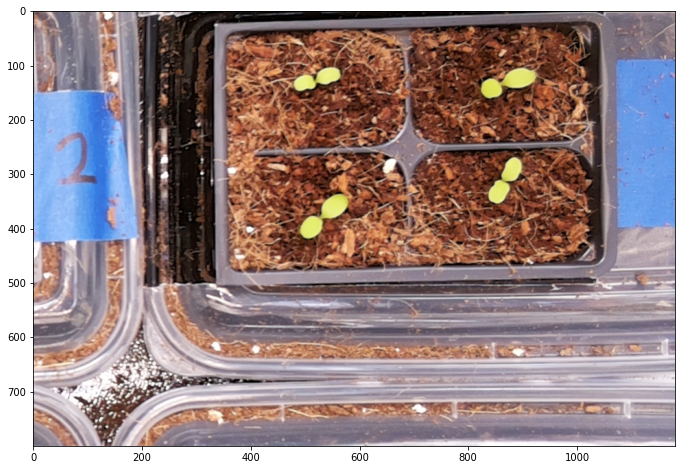

In [2]:
imageDirectory = "/media/jee/Shared Partition/camera/pre-move/3"
imageList = st.get_image_list(imageDirectory)

# Show an image form imageList
st.show_image_file(imageList[100])

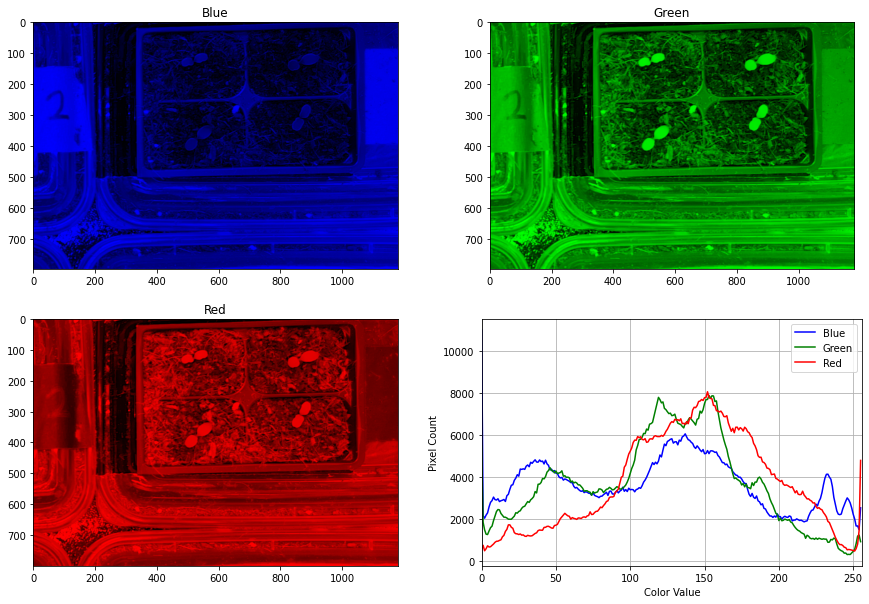

In [3]:
st.plot_image_file_histogram_bgr(imageList[100])

# Let's Look at only the red channel

In [4]:
image = cv2.imread(imageList[100])
imageRed = image[:,:,2]
imageGreen = image[:,:,1]
imageBlue = image[:,:,0]

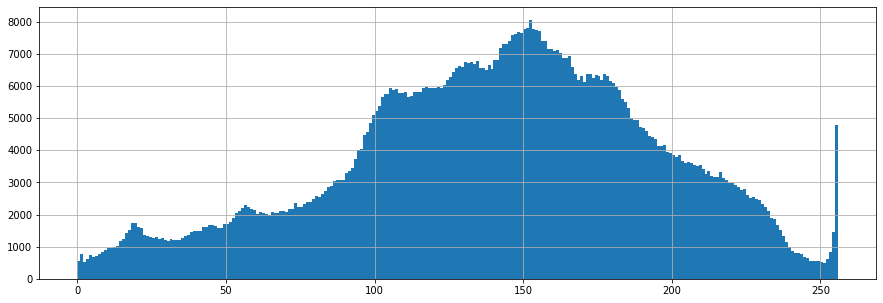

In [5]:
st.plot_gray_histogram(imageRed)

### Threshold the red channel and look at image.

In [6]:
def plot_thresholded_hist(image, thresholdValue1, thresholdValue2, kernel):
    imageRedBlurred = cv2.blur(image, (kernel,kernel))
    ret, thresh1 = cv2.threshold(imageRedBlurred, thresholdValue1, 255, cv2.THRESH_TOZERO)
    ret, thresh2 = cv2.threshold(thresh1, thresholdValue2, 255, cv2.THRESH_TOZERO_INV)
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].imshow(thresh2, cmap='gray')
    ax[1].hist(imageRedBlurred.ravel(),256,[0,256])
    ax[1].axvline(thresholdValue1, color='#ff7f0e', linewidth=4)
    ax[1].axvline(thresholdValue2, color='#d62728', linewidth=4)
    ax[1].grid()
    plt.show()

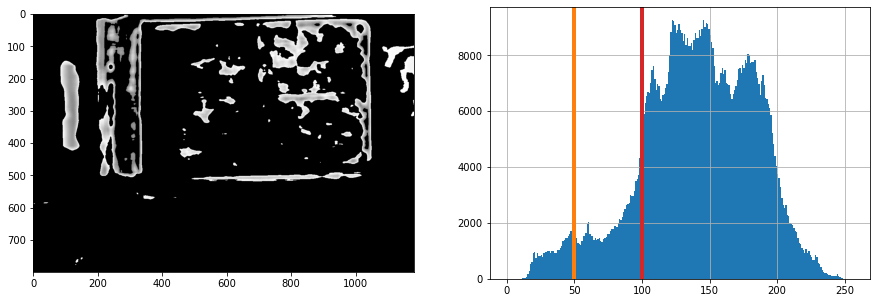

In [32]:
plot_thresholded_hist(imageRed, 50, 100, 20)

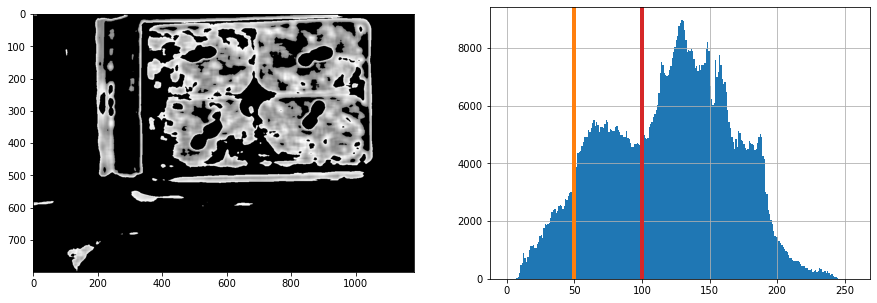

In [34]:
plot_thresholded_hist(imageGreen, 50, 100, 20)

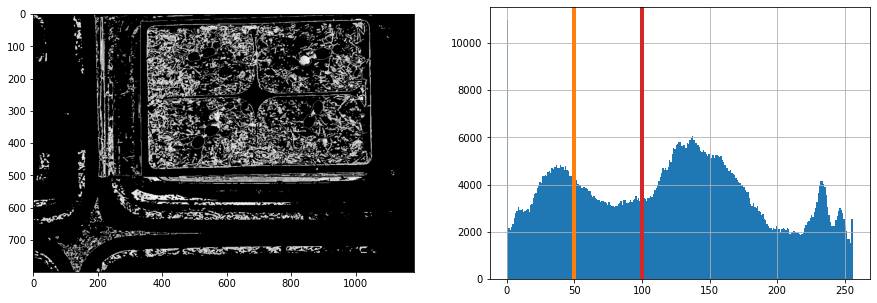

In [36]:
plot_thresholded_hist(imageBlue, 50, 100, 1)

# Look at Only Coco

In [10]:
imageCocoDirectory = "/media/jee/Shared Partition/camera/coco-cropped"
imageCocoList = st.get_image_list(imageCocoDirectory)

Searching in : /media/jee/Shared Partition/camera/coco-cropped
Found 5 .jpg images.


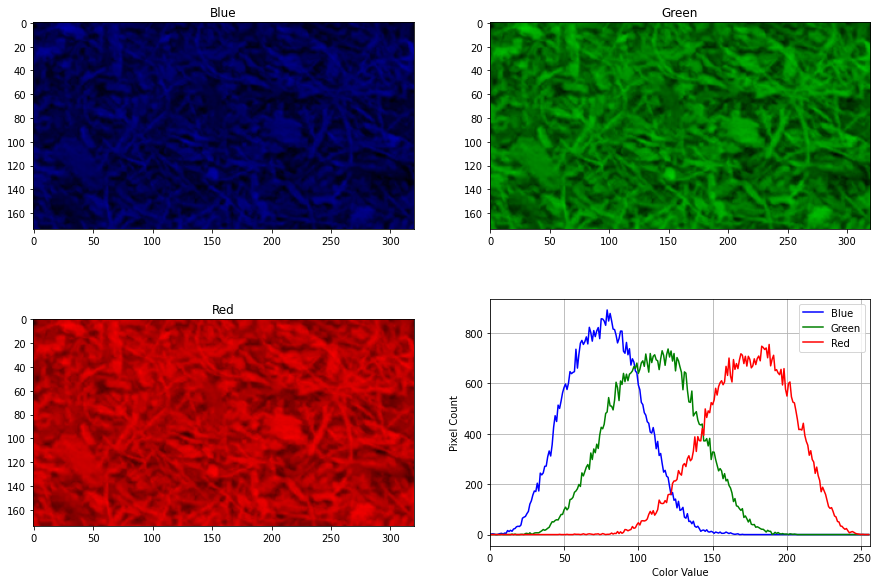

In [11]:
st.plot_image_file_histogram_bgr(imageCocoList[0])

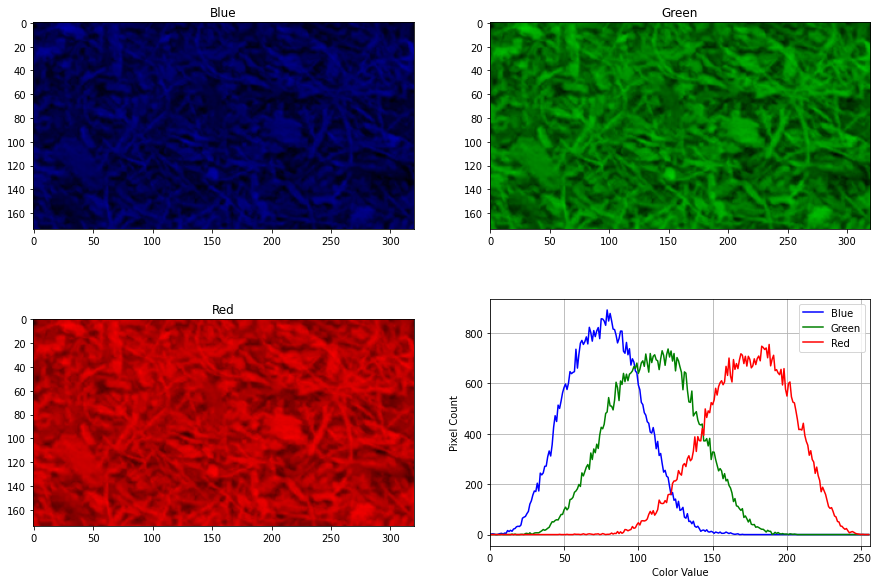

In [12]:
st.plot_image_file_histogram_bgr(imageCocoList[1])

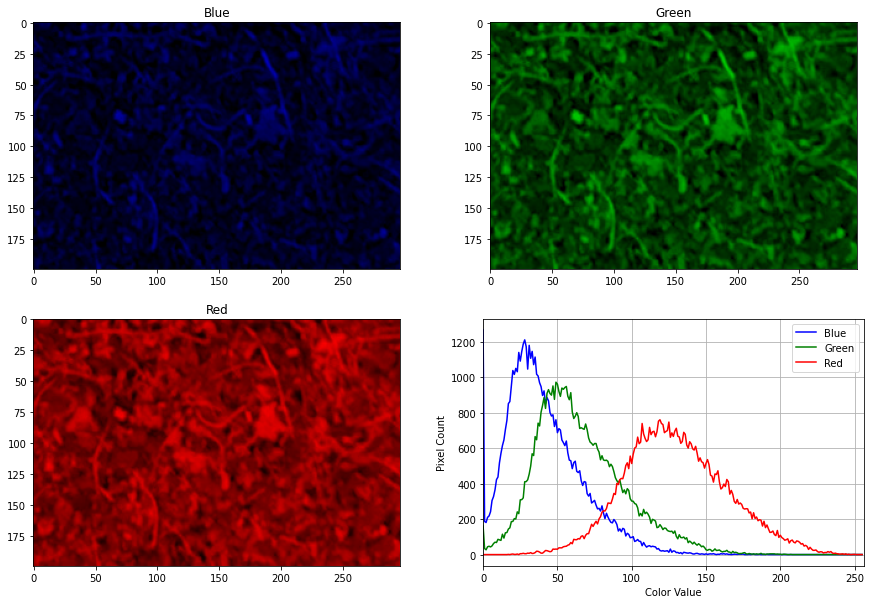

In [13]:
st.plot_image_file_histogram_bgr(imageCocoList[2])

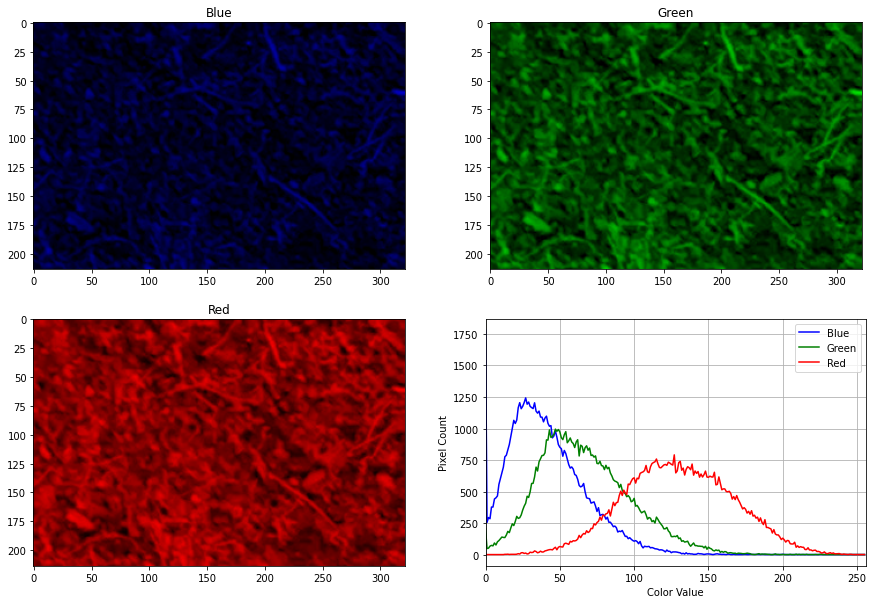

In [14]:
st.plot_image_file_histogram_bgr(imageCocoList[3])

# Label Segmentation
## This is pretty good

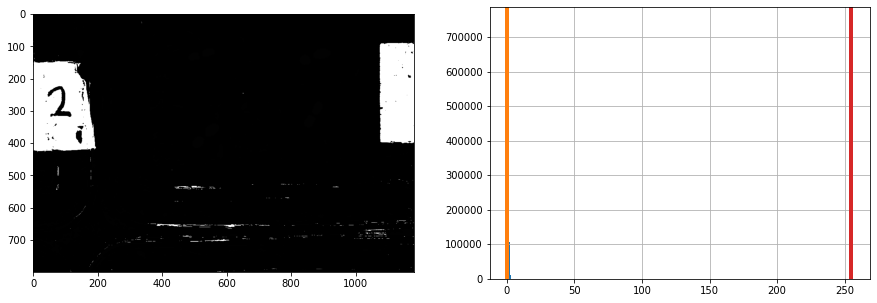

In [15]:
image = cv2.imread(imageList[100])
imageRed = image[:,:,2]
imageGreen = image[:,:,1]
imageBlue = image[:,:,0]
kernel = 1

imageBlueBlurred = cv2.blur(imageBlue, (kernel,kernel))
imageGreenBlurred = cv2.blur(imageGreen, (kernel,kernel))
imageRedBlurred = cv2.blur(imageRed, (kernel,kernel))


ret, threshGreen = cv2.threshold(imageGreenBlurred, 200, 255, cv2.THRESH_BINARY)
ret, threshBlue = cv2.threshold(imageBlueBlurred, 200, 255, cv2.THRESH_BINARY)
ret, threshRed = cv2.threshold(imageRedBlurred, 200, 255, cv2.THRESH_BINARY)

imageBgr = threshBlue-threshRed-threshGreen
imageBgr[imageBgr<0]=0
plot_thresholded_hist(imageBgr, 0, 255, 1)

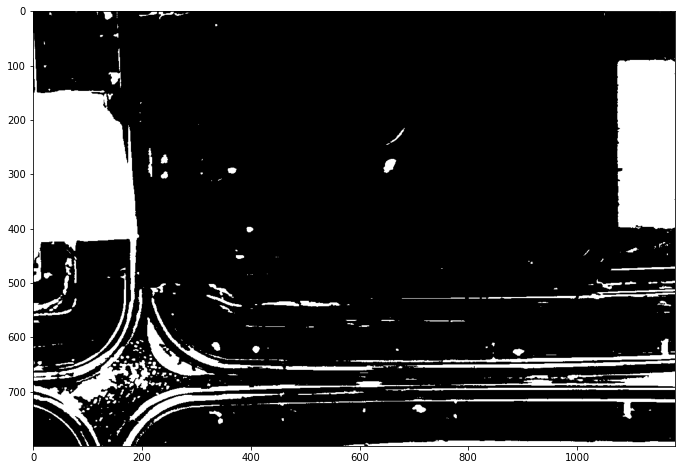

In [26]:
contours, hierarchy = cv2.findContours(threshBlue.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
externalContours = np.zeros(imageBgr.shape)
internalContours = np.zeros(imageBgr.shape)
for i in range(len(contours)):
    # external contours
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(externalContours, contours, i, 255, -1)
st.show_image(externalContours, cmap='gray')

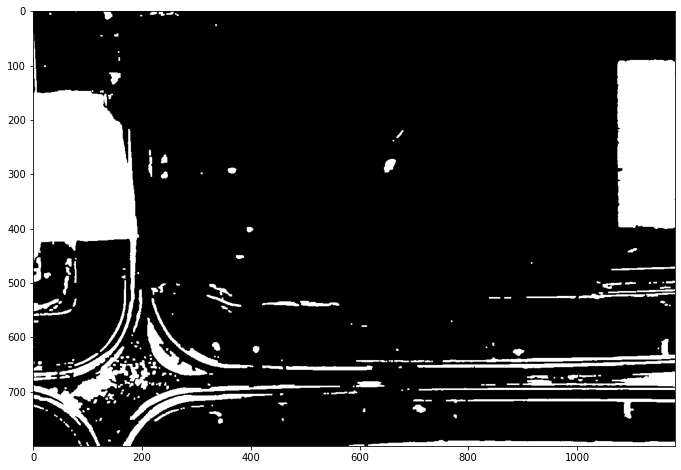

In [27]:
kernel = np.ones((3,3), dtype=np.uint8)
opening = cv2.morphologyEx(externalContours, cv2.MORPH_OPEN, kernel, iterations=1)
st.show_image(opening, cmap='gray')

In [28]:
distanceTransform = cv2.distanceTransform(opening.astype(np.uint8), cv2.DIST_L2, 5).astype(np.uint8)

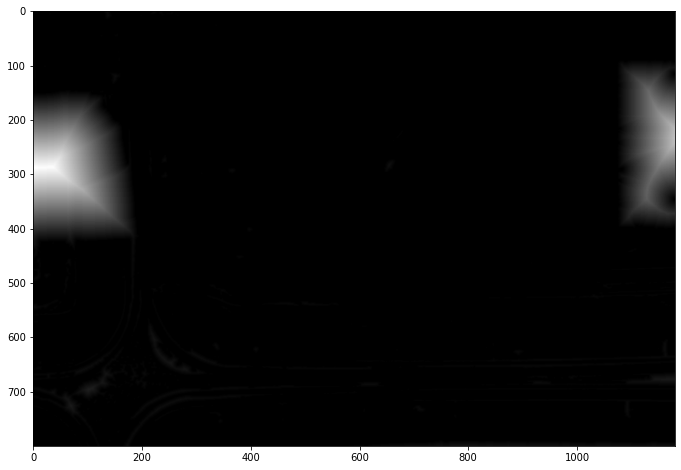

In [29]:
st.show_image(distanceTransform, cmap='gray')